In [ ]:
# The pip install can take a minute
%pip install -q urllib3<2.0 datascience ipywidgets
import pyodide_http
pyodide_http.patch_all()

from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore')


## Lecture 12 ##

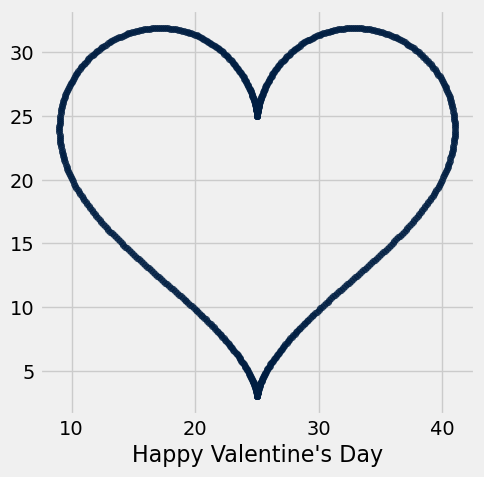

In [2]:
t = np.arange(0, 2200, 3.146)
x = 16 * np.sin(t) ** 3 + 25
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t) + 20
Table().with_columns("Happy Valentine's Day", x, '', y).scatter(0, 1)

## A Join Example ##

In [3]:
full = Table.read_table('nc-est2019-agesex-res.csv')
census = full.select('SEX', 'AGE', 'POPESTIMATE2019')
census.show(3)

SEX,AGE,POPESTIMATE2019
0,0,3783052
0,1,3829599
0,2,3922044


In [4]:
sex_codes = Table().with_columns(
    'SEX CODE', make_array(0, 1, 2),
    'CODE DEFINITION', make_array('All', 'Selected Male', 'Selected Female')
)
sex_codes

SEX CODE,CODE DEFINITION
0,All
1,Selected Male
2,Selected Female


In [6]:
sex_codes.join('SEX CODE', census, 'SEX').sort('AGE').show(3)

SEX CODE,CODE DEFINITION,AGE,POPESTIMATE2019
0,All,0,3783052
1,Selected Male,0,1935117
2,Selected Female,0,1847935


## Bike Sharing ##

In [ ]:
trip = Table.read_table('trip.csv')
trip.show(3)

## Distribution of Durations ##

In [ ]:
trip.hist('Duration')

In [ ]:
trip.sort('Duration', descending=True)

In [ ]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

In [ ]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

In [ ]:
# Approx percent of people who have 
# a ride duration between 250 and 500 seconds
# "between" = [250, 500) 

(500-250) * 0.15 

In [ ]:
commute.where('Duration', are.between(250, 500)).num_rows

In [ ]:
commute.num_rows

In [ ]:
129079 / 338343

In [ ]:
commute.hist('Duration', bins=np.arange(0, 1800, 250), unit='Second')

In [ ]:
commute.hist('Duration', bins=60, unit='Second')

## Start and End Stations ##

In [ ]:
# Most common start station

starts = commute.group('Start Station').sort('count', descending=True)
starts

In [ ]:
# Numbers of trips between stations

commute.pivot('Start Station', 'End Station')

In [ ]:
# Average durations of trips between stations

commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

## Fastest Trips between Stations ##

How can we find the fastest trip ever between each pair of stations?

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest.show(5)

## Discussion question

Find the 5 stations closest to Civic Center BART by minimum trip time.

In [ ]:
from_cc = shortest.where(
    'Start Station', are.containing('Civic Center BART')).sort(
    'Duration min')
from_cc.take(np.arange(5))

## Maps ##

In [ ]:
# Geographical data on the stations
stations = Table.read_table('station.csv').drop(4, 6)
stations

In [ ]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations
 .select('lat', 'long', 'name')
 .relabeled('name', 'labels'))
sf_stations_map_data.show(3)

In [ ]:
Marker.map_table(sf_stations_map_data)

In [ ]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [ ]:
from_cc.show(3)

In [ ]:
sf_stations_map_data.show(3)

In [ ]:
close_cc = from_cc.where('Duration min', are.below(4 * 60))
close_markers = (sf_stations_map_data
      .join('labels', close_cc, 'End Station')
      .select('lat', 'long', 'labels'))
Marker.map_table(close_markers)

Choose marker colors by the minimum time from Civic Center

In [ ]:
minutes = np.round(from_cc.column("Duration min") / 60)
print(min(minutes), max(minutes))

In [ ]:
colors = Table().with_columns(
    "minutes", np.arange(15),
    "colors",  ["darkblue", "blue", "lightblue", 
                "darkgreen", "green", "lightgreen",
                "orange", "darkred", "red",
                "gray", "gray", "gray", 
                "gray", "gray", "gray"])
colors_cc = (from_cc
 .with_column("Minutes", minutes)
 .join("Minutes", colors, "minutes"))

colored_markers = (sf_stations_map_data
      .join('labels', colors_cc, 'End Station')
      .select('lat', 'long', 'labels', 'colors'))
Marker.map_table(colored_markers)

In [ ]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts.show(3)

In [ ]:
sf_starts = station_starts.relabeled(
    'name', 'labels').where('landmark', 'San Francisco')

In [ ]:
sf_starts_map_data = sf_starts.select('lat', 'long', 'labels').with_columns(
    'colors', 'blue',
    'areas', sf_starts.column('count') / 10
)
sf_starts_map_data.show(3)

In [ ]:
Circle.map_table(sf_starts_map_data)